In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import numpy as np

# read in results.xlsx
df = pd.read_excel("results.xlsx")
df1 = pd.read_excel("results1.xlsx")
df_cluster = pd.read_excel("results_cluster.xlsx")

In [2]:
# activate seaborn
# whitegrid
plt.figure(figsize=(10,6))
colors_cool = ["#9ebcda","#8c96c6","#88419d","#4d004b","#563635"]
color_palette = sns.color_palette(colors_cool)
sns.set_palette(color_palette)
sns.set_style("whitegrid")

<Figure size 1000x600 with 0 Axes>

In [3]:
def plot_single_auroc(aurocs, linestyle, name, color):
    # Get length of dataset_json
    length = len(aurocs[0])

    # Create numpy array for aurocs
    aurocs_array = np.zeros(length)

    num_aurocs = len(aurocs)

    # Calculate averages for aurocs
    for dataset_json in aurocs:
        for i, eps_auroc in enumerate(dataset_json):
            auroc = eps_auroc["AUROC"]
            aurocs_array[i] += auroc
    aurocs_array /= num_aurocs

    # Plot aurocs
    x = np.arange(0, 1.1, 0.1)
    plt.plot(x, aurocs_array, linestyle=linestyle, label=name, color=color)
    plt.xlabel('$\epsilon$')
    plt.ylabel('AUROC')
    plt.legend()

In [4]:
def plot_multiple_aurocs(softmax_aurocs, energy_aurocs, softmax_linestyle, energy_linestyle, softmax_name, energy_name, softmax_color, energy_color):
    #plt.figure(figsize=(6,4))
    # Get length of dataset_json
    length = len(softmax_aurocs[0])

    # Create numpy arrays for softmax and energy aurocs
    softmax_aurocs_array = np.zeros(length)
    energy_aurocs_array = np.zeros(length)

    num_aurocs = len(softmax_aurocs)

    # Calculate averages for softmax aurocs
    for dataset_json in softmax_aurocs:
        for i, eps_auroc in enumerate(dataset_json):
            auroc = eps_auroc["AUROC"]
            softmax_aurocs_array[i] += auroc
    softmax_aurocs_array /= num_aurocs

    # Calculate averages for energy aurocs
    for dataset_json in energy_aurocs:
        for i, eps_auroc in enumerate(dataset_json):
            auroc = eps_auroc["AUROC"]
            energy_aurocs_array[i] += auroc
    energy_aurocs_array /= num_aurocs

    # Plot softmax and energy aurocs
    x = np.arange(0, 1.1, 0.1)
    plt.plot(x, softmax_aurocs_array, linestyle=softmax_linestyle, label=softmax_name, color=softmax_color)
    plt.plot(x, energy_aurocs_array, linestyle=energy_linestyle, label=energy_name, color=energy_color)
    plt.xlabel('$\epsilon$')
    plt.ylabel('AUROC')
    plt.legend()
    #plt.show()

### CIFAR10/CIFAR100/ImageNet with OE vs AOE Adversarial AUROC

In [5]:
# get the dataframes for cifar10 and cifar100
df_cifar10 = df[df["dataset_in"] == "cifar10"]
df_cifar100 = df[df["dataset_in"] == "cifar100"]

oe_imagenet = df_cluster.iloc[4]
aoe_imagenet = df_cluster.iloc[9]

df_imagenet = df_cluster[df_cluster["short_name"]=="IMAGENET_EBA_ACCURACY"]

df_noise = df[df["short_name"]=="CIFAR_NOISE"]
df_noise10 = df_noise[df_noise["dataset_in"]=="cifar10"]
df_noise100 = df_noise[df_noise["dataset_in"]=="cifar100"]

In [6]:
df_cifar10 = df[df["dataset_in"] == "cifar10"]

oe_adversarial_aurocs = None
# get df_cifar10 where adv_oe = NaN
df_cifar10_oe = df_cifar10[df_cifar10["adv_oe"].isna()]

# get the value from the first row save_id
save_id = df_cifar10_oe.iloc[0]["save_id"]
print(save_id)
# now load the json from /adversarial_aurocs with the save_id
with open(f"adversarial_aurocs/{save_id}.json") as f:
    oe_adversarial_aurocs = json.load(f)

print(oe_adversarial_aurocs)
softmax_aurocs_cifar10_oe = oe_adversarial_aurocs[0]
energy_aurocs_cifar10_oe = oe_adversarial_aurocs[1]

aoe_adversarial_aurocs = None
# get df_cifar10 where adv_oe = EBA
df_cifar10_aoe = df_cifar10[df_cifar10["adv_oe"] == "EBA"]

# get the value from the first row save_id
save_id = df_cifar10_aoe.iloc[0]["save_id"]
print(save_id)
# now load the json from /adversarial_aurocs with the save_id
with open(f"adversarial_aurocs/{save_id}.json") as f:
    aoe_adversarial_aurocs = json.load(f)

print(aoe_adversarial_aurocs)
softmax_aurocs_cifar10_aoe = aoe_adversarial_aurocs[0]
energy_aurocs_cifar10_aoe = aoe_adversarial_aurocs[1]



20240322_141746
[[[{'AUROC': 0.8703541159629822, 'AUPR-IN': 0.7759575843811035, 'AUPR-OUT': 0.9173471331596375, 'FPR95TPR': 0.47850000858306885, 'Dataset': 'textures', 'Method': 'Adversarial Softmax', 'Epsilon': 0}, {'AUROC': 0.6723632216453552, 'AUPR-IN': 0.5712296962738037, 'AUPR-OUT': 0.7428123950958252, 'FPR95TPR': 1.0, 'Dataset': 'textures', 'Method': 'Adversarial Softmax', 'Epsilon': 0.1}, {'AUROC': 0.5551875829696655, 'AUPR-IN': 0.4399365782737732, 'AUPR-OUT': 0.6661191582679749, 'FPR95TPR': 1.0, 'Dataset': 'textures', 'Method': 'Adversarial Softmax', 'Epsilon': 0.2}, {'AUROC': 0.491923987865448, 'AUPR-IN': 0.3842427134513855, 'AUPR-OUT': 0.6262184381484985, 'FPR95TPR': 1.0, 'Dataset': 'textures', 'Method': 'Adversarial Softmax', 'Epsilon': 0.3}, {'AUROC': 0.4603400230407715, 'AUPR-IN': 0.3615837097167969, 'AUPR-OUT': 0.605270266532898, 'FPR95TPR': 1.0, 'Dataset': 'textures', 'Method': 'Adversarial Softmax', 'Epsilon': 0.4}, {'AUROC': 0.445809543132782, 'AUPR-IN': 0.351206928491

In [7]:
df_cifar100 = df[df["dataset_in"] == "cifar100"]

oe_adversarial_aurocs = None
# get df_cifar100 where adv_oe = NaN
df_cifar100_oe = df_cifar100[df_cifar100["adv_oe"].isna()]

# get the value from the first row save_id
save_id = df_cifar100_oe.iloc[0]["save_id"]
#print(save_id)
# now load the json from /adversarial_aurocs with the save_id
with open(f"adversarial_aurocs/{save_id}.json") as f:
    oe_adversarial_aurocs = json.load(f)

#print(oe_adversarial_aurocs)
softmax_aurocs_cifar100_oe = oe_adversarial_aurocs[0]
energy_aurocs_cifar100_oe = oe_adversarial_aurocs[1]

aoe_adversarial_aurocs = None
# get df_cifar10 where adv_oe = EBA
df_cifar100_aoe = df_cifar100[df_cifar100["adv_oe"] == "EBA"]

# get the value from the first row save_id
save_id = df_cifar100_aoe.iloc[0]["save_id"]
#print(save_id)
# now load the json from /adversarial_aurocs with the save_id
with open(f"adversarial_aurocs/{save_id}.json") as f:
    aoe_adversarial_aurocs = json.load(f)

#print(aoe_adversarial_aurocs)
softmax_aurocs_cifar100_aoe = aoe_adversarial_aurocs[0]
energy_aurocs_cifar100_aoe = aoe_adversarial_aurocs[1]



In [8]:
oe_imagenet = df_cluster.iloc[4]
aoe_imagenet = df_cluster.iloc[9]

oe_adversarial_aurocs = json.loads(oe_imagenet["auroc_adversarial"])

#print(oe_adversarial_aurocs)
softmax_aurocs_imagenet_oe = oe_adversarial_aurocs[0]
energy_aurocs_imagenet_oe = oe_adversarial_aurocs[1]

aoe_adversarial_aurocs = json.loads(aoe_imagenet["auroc_adversarial"])

#print(aoe_adversarial_aurocs)
softmax_aurocs_imagenet_aoe = aoe_adversarial_aurocs[0]
energy_aurocs_imagenet_aoe = aoe_adversarial_aurocs[1]



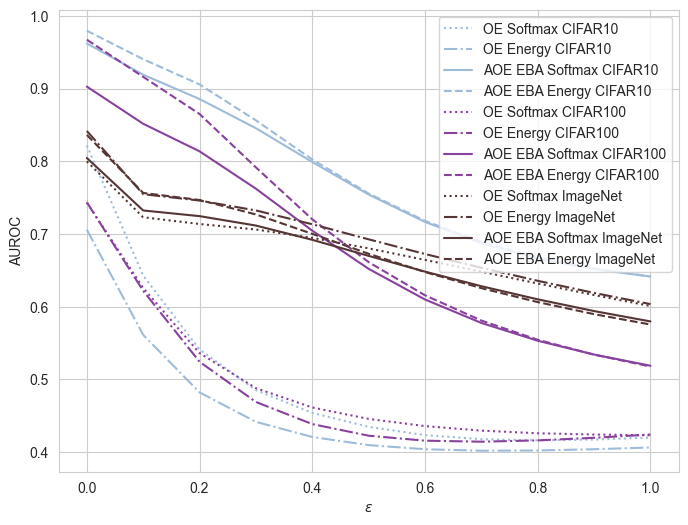

In [9]:
# set size
plt.figure(figsize=(8,6))
plot_multiple_aurocs(softmax_aurocs_cifar10_oe, energy_aurocs_cifar10_oe, 'dotted', 'dashdot', 'OE Softmax CIFAR10', 'OE Energy CIFAR10', colors_cool[0], colors_cool[0])
plot_multiple_aurocs(softmax_aurocs_cifar10_aoe, energy_aurocs_cifar10_aoe, '-', '--', 'AOE EBA Softmax CIFAR10', 'AOE EBA Energy CIFAR10', colors_cool[0], colors_cool[0])
plot_multiple_aurocs(softmax_aurocs_cifar100_oe, energy_aurocs_cifar100_oe, 'dotted',  'dashdot', 'OE Softmax CIFAR100', 'OE Energy CIFAR100', colors_cool[2], colors_cool[2])
plot_multiple_aurocs(softmax_aurocs_cifar100_aoe, energy_aurocs_cifar100_aoe, '-', '--', 'AOE EBA Softmax CIFAR100', 'AOE EBA Energy CIFAR100', colors_cool[2], colors_cool[2])
plot_multiple_aurocs(softmax_aurocs_imagenet_oe, energy_aurocs_imagenet_oe, 'dotted',  'dashdot', 'OE Softmax ImageNet', 'OE Energy ImageNet', colors_cool[4], colors_cool[4])
plot_multiple_aurocs(softmax_aurocs_imagenet_aoe, energy_aurocs_imagenet_aoe, '-', '--', 'AOE EBA Softmax ImageNet', 'AOE EBA Energy ImageNet', colors_cool[4], colors_cool[4])
plt.show()

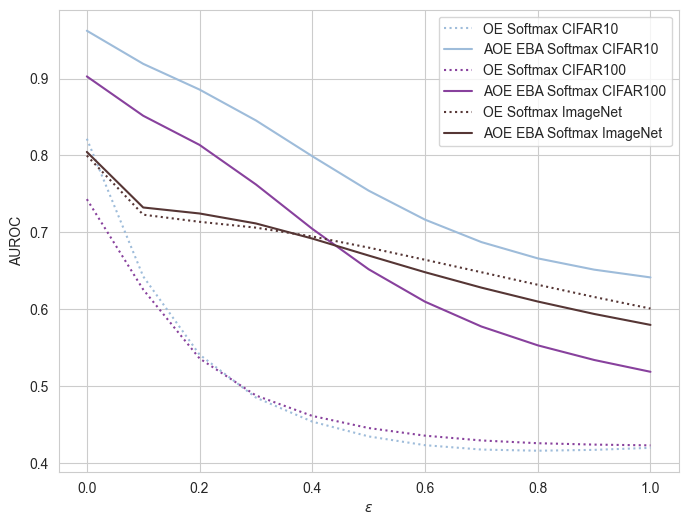

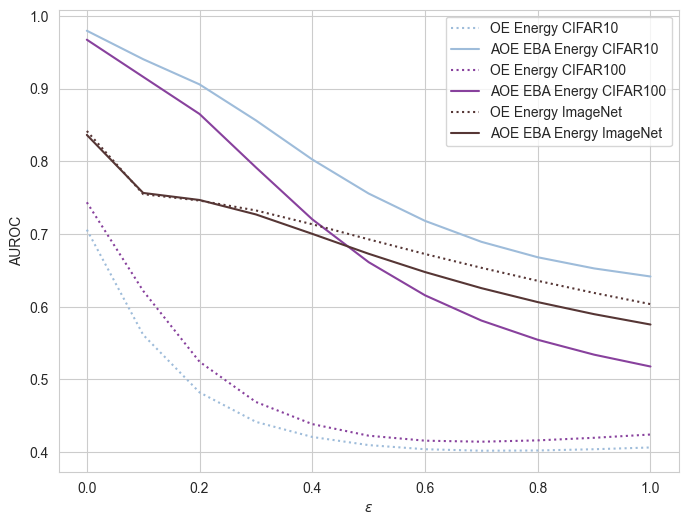

In [10]:
# only plot softmax aurocs
plt.figure(figsize=(8,6))
plot_single_auroc(softmax_aurocs_cifar10_oe, 'dotted', 'OE Softmax CIFAR10', colors_cool[0])
plot_single_auroc(softmax_aurocs_cifar10_aoe, '-', 'AOE EBA Softmax CIFAR10', colors_cool[0])
plot_single_auroc(softmax_aurocs_cifar100_oe, 'dotted', 'OE Softmax CIFAR100', colors_cool[2])
plot_single_auroc(softmax_aurocs_cifar100_aoe, '-', 'AOE EBA Softmax CIFAR100', colors_cool[2])
plot_single_auroc(softmax_aurocs_imagenet_oe, 'dotted', 'OE Softmax ImageNet', colors_cool[4])
plot_single_auroc(softmax_aurocs_imagenet_aoe, '-', 'AOE EBA Softmax ImageNet', colors_cool[4])
plt.show()

# only plot energy aurocs
plt.figure(figsize=(8,6))
plot_single_auroc(energy_aurocs_cifar10_oe, 'dotted', 'OE Energy CIFAR10', colors_cool[0])
plot_single_auroc(energy_aurocs_cifar10_aoe, '-', 'AOE EBA Energy CIFAR10', colors_cool[0])
plot_single_auroc(energy_aurocs_cifar100_oe, 'dotted', 'OE Energy CIFAR100', colors_cool[2])
plot_single_auroc(energy_aurocs_cifar100_aoe, '-', 'AOE EBA Energy CIFAR100', colors_cool[2])
plot_single_auroc(energy_aurocs_imagenet_oe, 'dotted', 'OE Energy ImageNet', colors_cool[4])
plot_single_auroc(energy_aurocs_imagenet_aoe, '-', 'AOE EBA Energy ImageNet', colors_cool[4])
plt.show()

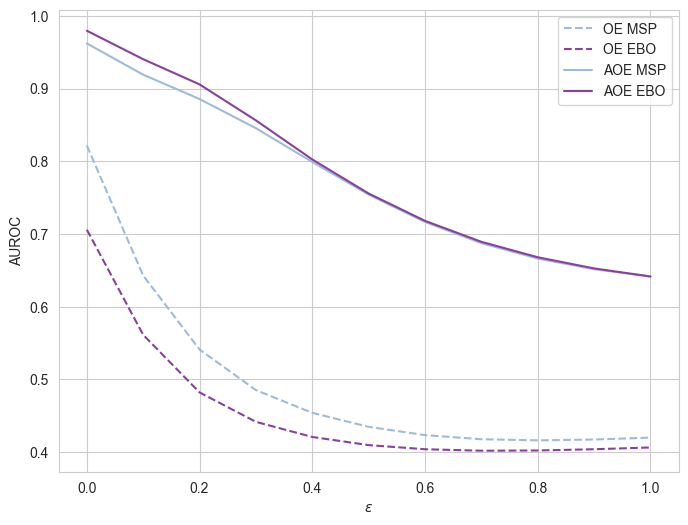

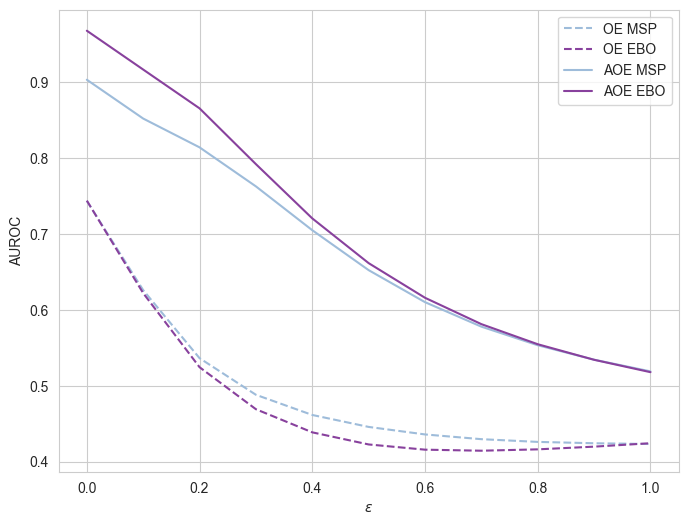

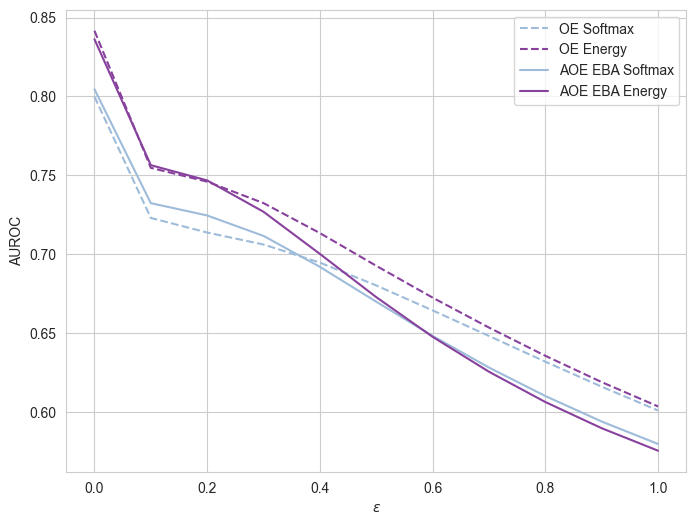

In [76]:
# only plot cifar10
plt.figure(figsize=(8,6))

plot_single_auroc(softmax_aurocs_cifar10_oe, '--', 'OE MSP', colors_cool[0])
plot_single_auroc(energy_aurocs_cifar10_oe, '--', 'OE EBO', colors_cool[2])
plot_single_auroc(softmax_aurocs_cifar10_aoe, '-', 'AOE MSP', colors_cool[0])
plot_single_auroc(energy_aurocs_cifar10_aoe, '-', 'AOE EBO', colors_cool[2])

plt.savefig("plots/cifar10_aurocs.pdf")

plt.show()

# only plot cifar100
plt.figure(figsize=(8,6))

plot_single_auroc(softmax_aurocs_cifar100_oe, '--', 'OE MSP', colors_cool[0])
plot_single_auroc(energy_aurocs_cifar100_oe, '--', 'OE EBO', colors_cool[2])
plot_single_auroc(softmax_aurocs_cifar100_aoe, '-', 'AOE MSP', colors_cool[0])
plot_single_auroc(energy_aurocs_cifar100_aoe, '-', 'AOE EBO', colors_cool[2])

plt.savefig("plots/cifar100_aurocs.pdf")

plt.show()

# only plot imagenet
plt.figure(figsize=(8,6))

plot_single_auroc(softmax_aurocs_imagenet_oe, '--', 'OE Softmax', colors_cool[0])
plot_single_auroc(energy_aurocs_imagenet_oe, '--', 'OE Energy', colors_cool[2])
plot_single_auroc(softmax_aurocs_imagenet_aoe, '-', 'AOE EBA Softmax', colors_cool[0])
plot_single_auroc(energy_aurocs_imagenet_aoe, '-', 'AOE EBA Energy', colors_cool[2])

plt.savefig("plots/imagenet_aurocs.pdf")

plt.show()

### plot auroc and accuracy for CIFAR10/CIFAR100 with OE vs AOE with epsilon on x axis

In [12]:
name = "Compute AUROC for CIFAR10 and CIFAR100 with GAN Outliers with EBA AOE with different epsilon values."
# get the dataframes for cifar10 and cifar100 with this name
df_cifar10 = df[(df["dataset_in"] == "cifar10") & (df["name"] == name)]
df_cifar100 = df[(df["dataset_in"] == "cifar100") & (df["name"] == name)]

In [13]:
auroc_dics = []
for i, row in df_cifar10.iterrows():
    auroc_dics.append({
        "eps_oe": row["eps_oe"],
        "auroc_test": row["auroc_test"]
    })

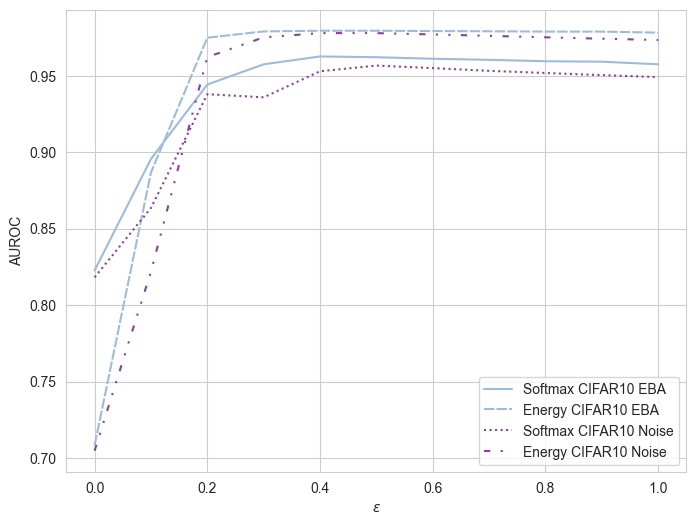

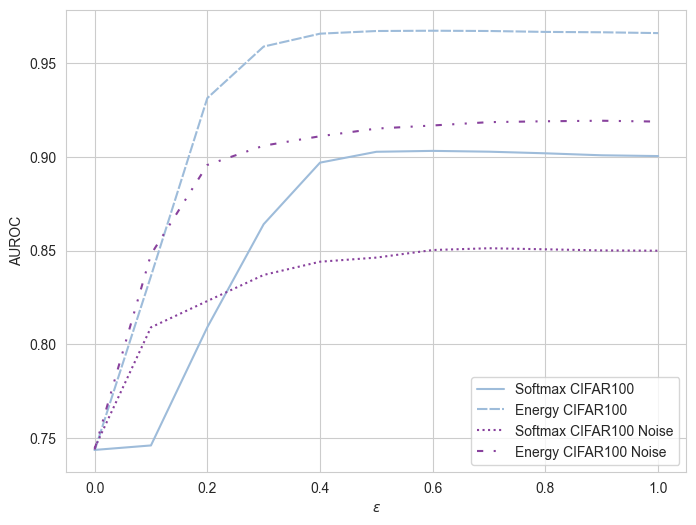

In [14]:
plt.figure(figsize=(8,6))

# cifar10
auroc_dics = []
for i, row in df_cifar10.iterrows():
    auroc_dics.append({
        "eps_oe": row["eps_oe"],
        "auroc_test": row["auroc_test"]
    })


softmax_aur = []
energy_aur = []
eps = []

# get the cifar10 data for OE, which corresponds to eps = 0
row = df.iloc[0]
row_auroc = json.loads(row["auroc_test"])
softmax_aur.append(row_auroc[0][-1]["metrics"]["AUROC"])
energy_aur.append(row_auroc[1][-1]["metrics"]["AUROC"])
eps.append(0)

for el in auroc_dics:
    softmax_aurocs = json.loads(el["auroc_test"])[0]
    energy_aurocs = json.loads(el["auroc_test"])[1]
    eps.append(el["eps_oe"])

    avg_softmax_auroc_dict = softmax_aurocs[-1]
    avg_energy_auroc_dict = energy_aurocs[-1]

    avg_softmax_auroc = avg_softmax_auroc_dict["metrics"]["AUROC"]
    avg_energy_auroc = avg_energy_auroc_dict["metrics"]["AUROC"]

    softmax_aur.append(avg_softmax_auroc)
    energy_aur.append(avg_energy_auroc)



plt.plot(eps, softmax_aur, label="Softmax CIFAR10 EBA", linestyle='-', color=colors_cool[0])
plt.plot(eps, energy_aur, label="Energy CIFAR10 EBA", linestyle=(0, (5, 1)), color=colors_cool[0])


#cifar10 noise
auroc_dics = []
for i, row in df_noise10.iterrows():
    auroc_dics.append({
        "eps_oe": row["eps_oe"],
        "auroc_test": row["auroc_test"]
    })

softmax_aur = []
energy_aur = []
eps = []

for el in auroc_dics:
    softmax_aurocs = json.loads(el["auroc_test"])[0]
    energy_aurocs = json.loads(el["auroc_test"])[1]
    eps.append(el["eps_oe"])

    avg_softmax_auroc_dict = softmax_aurocs[-1]
    avg_energy_auroc_dict = energy_aurocs[-1]

    avg_softmax_auroc = avg_softmax_auroc_dict["metrics"]["AUROC"]
    avg_energy_auroc = avg_energy_auroc_dict["metrics"]["AUROC"]

    softmax_aur.append(avg_softmax_auroc)
    energy_aur.append(avg_energy_auroc)

plt.plot(eps, softmax_aur, label="Softmax CIFAR10 Noise", linestyle='dotted', color=colors_cool[2])
plt.plot(eps, energy_aur, label="Energy CIFAR10 Noise", linestyle=(0, (3, 5, 1, 5, 1, 5)), color=colors_cool[2])


plt.xlabel('$\epsilon$')
plt.ylabel('AUROC')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))

#cifar100
auroc_dics = []
for i, row in df_cifar100.iterrows():
    auroc_dics.append({
        "eps_oe": row["eps_oe"],
        "auroc_test": row["auroc_test"]
    })


softmax_aur = []
energy_aur = []
eps = []

# get the cifar100 data for OE, which corresponds to eps = 0
row = df.iloc[1]
row_auroc = json.loads(row["auroc_test"])
softmax_aur.append(row_auroc[0][-1]["metrics"]["AUROC"])
energy_aur.append(row_auroc[1][-1]["metrics"]["AUROC"])
eps.append(0)


for el in auroc_dics:
    softmax_aurocs = json.loads(el["auroc_test"])[0]
    energy_aurocs = json.loads(el["auroc_test"])[1]
    eps.append(el["eps_oe"])

    avg_softmax_auroc_dict = softmax_aurocs[-1]
    avg_energy_auroc_dict = energy_aurocs[-1]

    avg_softmax_auroc = avg_softmax_auroc_dict["metrics"]["AUROC"]
    avg_energy_auroc = avg_energy_auroc_dict["metrics"]["AUROC"]

    softmax_aur.append(avg_softmax_auroc)
    energy_aur.append(avg_energy_auroc)

plt.plot(eps, softmax_aur, label="Softmax CIFAR100", linestyle='-', color=colors_cool[0])
plt.plot(eps, energy_aur, label="Energy CIFAR100", linestyle=(0, (5, 1)), color=colors_cool[0])

# #imagenet

# auroc_dics = []
# for i, row in df_imagenet.iterrows():
#     auroc_dics.append({
#         "eps_oe": row["eps_oe"],
#         "auroc_test": row["auroc_test"]
#     })

# softmax_aur = []
# energy_aur = []
# eps = []

# for el in auroc_dics:
#     softmax_aurocs = json.loads(el["auroc_test"])[0]
#     energy_aurocs = json.loads(el["auroc_test"])[1]
#     eps.append(el["eps_oe"])

#     avg_softmax_auroc_dict = softmax_aurocs[-1]
#     avg_energy_auroc_dict = energy_aurocs[-1]

#     avg_softmax_auroc = avg_softmax_auroc_dict["metrics"]["AUROC"]
#     avg_energy_auroc = avg_energy_auroc_dict["metrics"]["AUROC"]

#     softmax_aur.append(avg_softmax_auroc)
#     energy_aur.append(avg_energy_auroc)

# plt.plot(eps, softmax_aur, label="Softmax ImageNet", linestyle='-', color=colors_cool[4])
# plt.plot(eps, energy_aur, label="Energy ImageNet", linestyle='--', color=colors_cool[4])





#cifar100 noise
auroc_dics = []
for i, row in df_noise100.iterrows():
    auroc_dics.append({
        "eps_oe": row["eps_oe"],
        "auroc_test": row["auroc_test"]
    })

softmax_aur = []
energy_aur = []
eps = []

for el in auroc_dics:
    softmax_aurocs = json.loads(el["auroc_test"])[0]
    energy_aurocs = json.loads(el["auroc_test"])[1]
    eps.append(el["eps_oe"])

    avg_softmax_auroc_dict = softmax_aurocs[-1]
    avg_energy_auroc_dict = energy_aurocs[-1]

    avg_softmax_auroc = avg_softmax_auroc_dict["metrics"]["AUROC"]
    avg_energy_auroc = avg_energy_auroc_dict["metrics"]["AUROC"]

    softmax_aur.append(avg_softmax_auroc)
    energy_aur.append(avg_energy_auroc)

plt.plot(eps, softmax_aur, label="Softmax CIFAR100 Noise", linestyle='dotted', color=colors_cool[2])
plt.plot(eps, energy_aur, label="Energy CIFAR100 Noise", linestyle=(0, (3, 5, 1, 5, 1, 5)), color=colors_cool[2])

plt.xlabel('$\epsilon$')
plt.ylabel('AUROC')
plt.legend()
# plt.savefig("plots/aoe_cifar10_cifar100_imagenet_aoe_auroc.pdf", bbox_inches='tight')
plt.savefig("plots/aoe_cifar10_cifar100_aoe_noise_auroc.pdf", bbox_inches='tight')
plt.show()

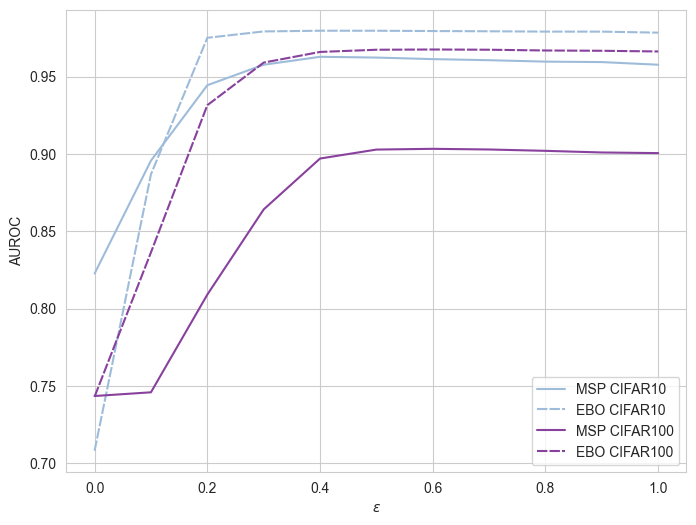

In [81]:
plt.figure(figsize=(8,6))

# cifar10
auroc_dics = []
for i, row in df_cifar10.iterrows():
    auroc_dics.append({
        "eps_oe": row["eps_oe"],
        "auroc_test": row["auroc_test"]
    })


softmax_aur = []
energy_aur = []
eps = []

# get the cifar10 data for OE, which corresponds to eps = 0
row = df.iloc[0]
row_auroc = json.loads(row["auroc_test"])
softmax_aur.append(row_auroc[0][-1]["metrics"]["AUROC"])
energy_aur.append(row_auroc[1][-1]["metrics"]["AUROC"])
eps.append(0)

for el in auroc_dics:
    softmax_aurocs = json.loads(el["auroc_test"])[0]
    energy_aurocs = json.loads(el["auroc_test"])[1]
    eps.append(el["eps_oe"])

    avg_softmax_auroc_dict = softmax_aurocs[-1]
    avg_energy_auroc_dict = energy_aurocs[-1]

    avg_softmax_auroc = avg_softmax_auroc_dict["metrics"]["AUROC"]
    avg_energy_auroc = avg_energy_auroc_dict["metrics"]["AUROC"]

    softmax_aur.append(avg_softmax_auroc)
    energy_aur.append(avg_energy_auroc)



plt.plot(eps, softmax_aur, label="MSP CIFAR10", linestyle='-', color=colors_cool[0])
plt.plot(eps, energy_aur, label="EBO CIFAR10", linestyle=(0, (5, 1)), color=colors_cool[0])

#cifar100
auroc_dics = []
for i, row in df_cifar100.iterrows():
    auroc_dics.append({
        "eps_oe": row["eps_oe"],
        "auroc_test": row["auroc_test"]
    })


softmax_aur = []
energy_aur = []
eps = []

# get the cifar100 data for OE, which corresponds to eps = 0
row = df.iloc[1]
row_auroc = json.loads(row["auroc_test"])
softmax_aur.append(row_auroc[0][-1]["metrics"]["AUROC"])
energy_aur.append(row_auroc[1][-1]["metrics"]["AUROC"])
eps.append(0)


for el in auroc_dics:
    softmax_aurocs = json.loads(el["auroc_test"])[0]
    energy_aurocs = json.loads(el["auroc_test"])[1]
    eps.append(el["eps_oe"])

    avg_softmax_auroc_dict = softmax_aurocs[-1]
    avg_energy_auroc_dict = energy_aurocs[-1]

    avg_softmax_auroc = avg_softmax_auroc_dict["metrics"]["AUROC"]
    avg_energy_auroc = avg_energy_auroc_dict["metrics"]["AUROC"]

    softmax_aur.append(avg_softmax_auroc)
    energy_aur.append(avg_energy_auroc)

plt.plot(eps, softmax_aur, label="MSP CIFAR100", linestyle='-', color=colors_cool[2])
plt.plot(eps, energy_aur, label="EBO CIFAR100", linestyle=(0, (5, 1)), color=colors_cool[2])

plt.xlabel('$\epsilon$')
plt.ylabel('AUROC')
plt.legend()
# plt.savefig("plots/aoe_cifar10_cifar100_imagenet_aoe_auroc.pdf", bbox_inches='tight')
plt.savefig("plots/aoe_cifar10_cifar100_aoe_auroc.pdf", bbox_inches='tight')
plt.show()

In [100]:
obj = df.iloc[19]["auroc_test"]
print(json.loads(obj))
print(obj[0])
print(obj[1])
print(json.loads(obj)[0][-1]["metrics"]["AUROC"])
print(json.loads(obj)[0][-1]["metrics"]["AUPR-IN"])
print(json.loads(obj)[0][-1]["metrics"]["AUPR-OUT"])
print(json.loads(obj)[0][-1]["metrics"]["FPR95TPR"])
print("---")
print(json.loads(obj)[1][-1]["metrics"]["AUROC"])
print(json.loads(obj)[1][-1]["metrics"]["AUPR-IN"])
print(json.loads(obj)[1][-1]["metrics"]["AUPR-OUT"])
print(json.loads(obj)[1][-1]["metrics"]["FPR95TPR"])

[[{'AUROC': 0.8665206432342529, 'AUPR-IN': 0.8062642812728882, 'AUPR-OUT': 0.9209126234054565, 'FPR95TPR': 0.47189998626708984, 'Dataset': 'textures', 'Method': 'Softmax'}, {'AUROC': 0.8867929577827454, 'AUPR-IN': 0.8852393627166748, 'AUPR-OUT': 0.898967444896698, 'FPR95TPR': 0.4115999937057495, 'Dataset': 'lsun resize', 'Method': 'Softmax'}, {'AUROC': 0.8693552017211914, 'AUPR-IN': 0.8595402240753174, 'AUPR-OUT': 0.8877022862434387, 'FPR95TPR': 0.43140000104904175, 'Dataset': 'lsun crop', 'Method': 'Softmax'}, {'AUROC': 0.9996963143348694, 'AUPR-IN': 0.995396614074707, 'AUPR-OUT': 0.9999846816062927, 'FPR95TPR': 0.00019999999494757503, 'Dataset': 'gaussian noise', 'Method': 'Softmax'}, {'AUROC': 0.9999958276748657, 'AUPR-IN': 0.9999170303344727, 'AUPR-OUT': 0.9999997019767761, 'FPR95TPR': 0.0, 'Dataset': 'uniform noise', 'Method': 'Softmax'}, {'AUROC': 0.8624513149261475, 'AUPR-IN': 0.8598078489303589, 'AUPR-OUT': 0.8760408759117126, 'FPR95TPR': 0.4648999869823456, 'Dataset': 'tinyima

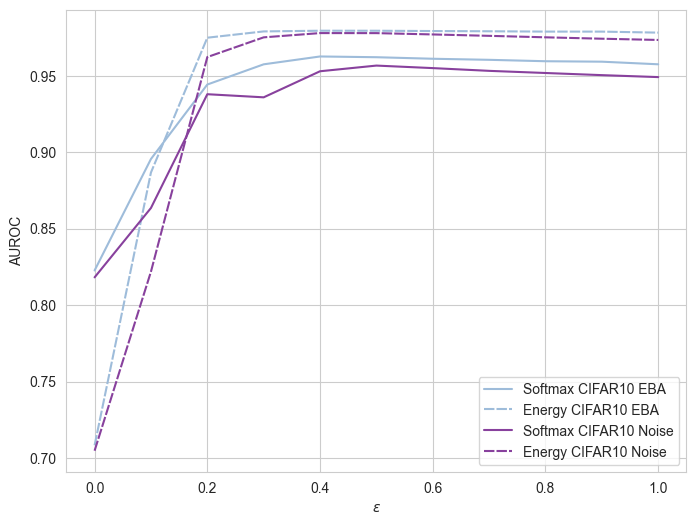

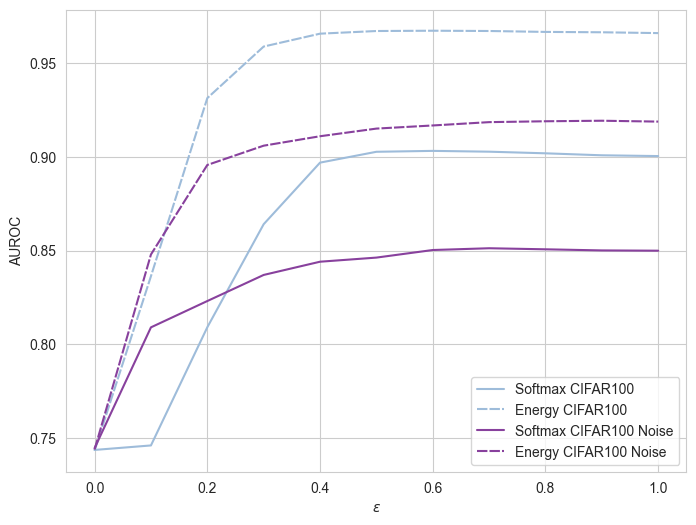

In [15]:
plt.figure(figsize=(8,6))

# cifar10
auroc_dics = []
for i, row in df_cifar10.iterrows():
    auroc_dics.append({
        "eps_oe": row["eps_oe"],
        "auroc_test": row["auroc_test"]
    })


softmax_aur = []
energy_aur = []
eps = []

# get the cifar10 data for OE, which corresponds to eps = 0
row = df.iloc[0]
row_auroc = json.loads(row["auroc_test"])
softmax_aur.append(row_auroc[0][-1]["metrics"]["AUROC"])
energy_aur.append(row_auroc[1][-1]["metrics"]["AUROC"])
eps.append(0)

for el in auroc_dics:
    softmax_aurocs = json.loads(el["auroc_test"])[0]
    energy_aurocs = json.loads(el["auroc_test"])[1]
    eps.append(el["eps_oe"])

    avg_softmax_auroc_dict = softmax_aurocs[-1]
    avg_energy_auroc_dict = energy_aurocs[-1]

    avg_softmax_auroc = avg_softmax_auroc_dict["metrics"]["AUROC"]
    avg_energy_auroc = avg_energy_auroc_dict["metrics"]["AUROC"]

    softmax_aur.append(avg_softmax_auroc)
    energy_aur.append(avg_energy_auroc)



plt.plot(eps, softmax_aur, label="Softmax CIFAR10 EBA", linestyle='-', color=colors_cool[0])
plt.plot(eps, energy_aur, label="Energy CIFAR10 EBA", linestyle=(0, (5, 1)), color=colors_cool[0])


#cifar10 noise
auroc_dics = []
for i, row in df_noise10.iterrows():
    auroc_dics.append({
        "eps_oe": row["eps_oe"],
        "auroc_test": row["auroc_test"]
    })

softmax_aur = []
energy_aur = []
eps = []

for el in auroc_dics:
    softmax_aurocs = json.loads(el["auroc_test"])[0]
    energy_aurocs = json.loads(el["auroc_test"])[1]
    eps.append(el["eps_oe"])

    avg_softmax_auroc_dict = softmax_aurocs[-1]
    avg_energy_auroc_dict = energy_aurocs[-1]

    avg_softmax_auroc = avg_softmax_auroc_dict["metrics"]["AUROC"]
    avg_energy_auroc = avg_energy_auroc_dict["metrics"]["AUROC"]

    softmax_aur.append(avg_softmax_auroc)
    energy_aur.append(avg_energy_auroc)

plt.plot(eps, softmax_aur, label="Softmax CIFAR10 Noise", linestyle='-', color=colors_cool[2])
plt.plot(eps, energy_aur, label="Energy CIFAR10 Noise", linestyle=(0, (5, 1)), color=colors_cool[2])


plt.xlabel('$\epsilon$')
plt.ylabel('AUROC')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))

#cifar100
auroc_dics = []
for i, row in df_cifar100.iterrows():
    auroc_dics.append({
        "eps_oe": row["eps_oe"],
        "auroc_test": row["auroc_test"]
    })


softmax_aur = []
energy_aur = []
eps = []

# get the cifar100 data for OE, which corresponds to eps = 0
row = df.iloc[1]
row_auroc = json.loads(row["auroc_test"])
softmax_aur.append(row_auroc[0][-1]["metrics"]["AUROC"])
energy_aur.append(row_auroc[1][-1]["metrics"]["AUROC"])
eps.append(0)


for el in auroc_dics:
    softmax_aurocs = json.loads(el["auroc_test"])[0]
    energy_aurocs = json.loads(el["auroc_test"])[1]
    eps.append(el["eps_oe"])

    avg_softmax_auroc_dict = softmax_aurocs[-1]
    avg_energy_auroc_dict = energy_aurocs[-1]

    avg_softmax_auroc = avg_softmax_auroc_dict["metrics"]["AUROC"]
    avg_energy_auroc = avg_energy_auroc_dict["metrics"]["AUROC"]

    softmax_aur.append(avg_softmax_auroc)
    energy_aur.append(avg_energy_auroc)

plt.plot(eps, softmax_aur, label="Softmax CIFAR100", linestyle='-', color=colors_cool[0])
plt.plot(eps, energy_aur, label="Energy CIFAR100", linestyle=(0, (5, 1)), color=colors_cool[0])

# #imagenet

# auroc_dics = []
# for i, row in df_imagenet.iterrows():
#     auroc_dics.append({
#         "eps_oe": row["eps_oe"],
#         "auroc_test": row["auroc_test"]
#     })

# softmax_aur = []
# energy_aur = []
# eps = []

# for el in auroc_dics:
#     softmax_aurocs = json.loads(el["auroc_test"])[0]
#     energy_aurocs = json.loads(el["auroc_test"])[1]
#     eps.append(el["eps_oe"])

#     avg_softmax_auroc_dict = softmax_aurocs[-1]
#     avg_energy_auroc_dict = energy_aurocs[-1]

#     avg_softmax_auroc = avg_softmax_auroc_dict["metrics"]["AUROC"]
#     avg_energy_auroc = avg_energy_auroc_dict["metrics"]["AUROC"]

#     softmax_aur.append(avg_softmax_auroc)
#     energy_aur.append(avg_energy_auroc)

# plt.plot(eps, softmax_aur, label="Softmax ImageNet", linestyle='-', color=colors_cool[4])
# plt.plot(eps, energy_aur, label="Energy ImageNet", linestyle='--', color=colors_cool[4])





#cifar100 noise
auroc_dics = []
for i, row in df_noise100.iterrows():
    auroc_dics.append({
        "eps_oe": row["eps_oe"],
        "auroc_test": row["auroc_test"]
    })

softmax_aur = []
energy_aur = []
eps = []

for el in auroc_dics:
    softmax_aurocs = json.loads(el["auroc_test"])[0]
    energy_aurocs = json.loads(el["auroc_test"])[1]
    eps.append(el["eps_oe"])

    avg_softmax_auroc_dict = softmax_aurocs[-1]
    avg_energy_auroc_dict = energy_aurocs[-1]

    avg_softmax_auroc = avg_softmax_auroc_dict["metrics"]["AUROC"]
    avg_energy_auroc = avg_energy_auroc_dict["metrics"]["AUROC"]

    softmax_aur.append(avg_softmax_auroc)
    energy_aur.append(avg_energy_auroc)

plt.plot(eps, softmax_aur, label="Softmax CIFAR100 Noise", linestyle='-', color=colors_cool[2])
plt.plot(eps, energy_aur, label="Energy CIFAR100 Noise", linestyle=(0, (5, 1)), color=colors_cool[2])

plt.xlabel('$\epsilon$')
plt.ylabel('AUROC')
plt.legend()
# plt.savefig("plots/aoe_cifar10_cifar100_imagenet_aoe_auroc.pdf", bbox_inches='tight')
plt.savefig("plots/aoe_cifar10_cifar100_aoe_noise_auroc.pdf", bbox_inches='tight')
plt.show()

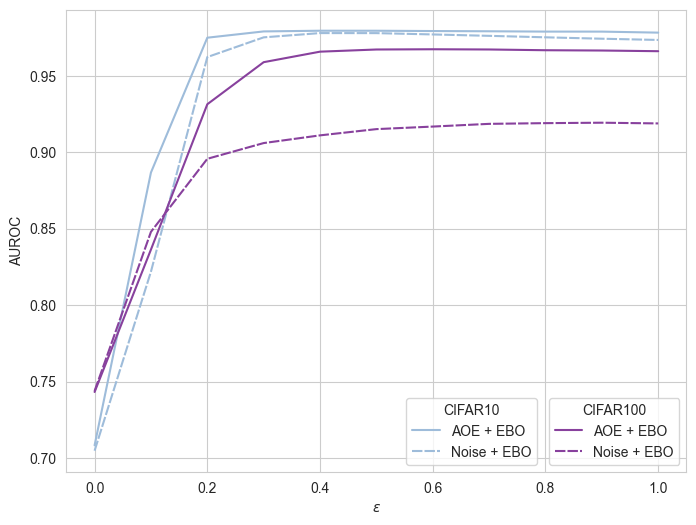

In [71]:
plt.figure(figsize=(8,6))

# cifar10
auroc_dics = []
for i, row in df_cifar10.iterrows():
    auroc_dics.append({
        "eps_oe": row["eps_oe"],
        "auroc_test": row["auroc_test"]
    })


softmax_aur = []
energy_aur = []
eps = []

# get the cifar10 data for OE, which corresponds to eps = 0
row = df.iloc[0]
row_auroc = json.loads(row["auroc_test"])
softmax_aur.append(row_auroc[0][-1]["metrics"]["AUROC"])
energy_aur.append(row_auroc[1][-1]["metrics"]["AUROC"])
eps.append(0)

for el in auroc_dics:
    softmax_aurocs = json.loads(el["auroc_test"])[0]
    energy_aurocs = json.loads(el["auroc_test"])[1]
    eps.append(el["eps_oe"])

    avg_softmax_auroc_dict = softmax_aurocs[-1]
    avg_energy_auroc_dict = energy_aurocs[-1]

    avg_softmax_auroc = avg_softmax_auroc_dict["metrics"]["AUROC"]
    avg_energy_auroc = avg_energy_auroc_dict["metrics"]["AUROC"]

    softmax_aur.append(avg_softmax_auroc)
    energy_aur.append(avg_energy_auroc)



# plt.plot(eps, softmax_aur, label="Softmax CIFAR10 EBA", linestyle='-', color=colors_cool[0])
plot1, = plt.plot(eps, energy_aur, label="AOE + EBO", linestyle="-", color=colors_cool[0])


#cifar10 noise
auroc_dics = []
for i, row in df_noise10.iterrows():
    auroc_dics.append({
        "eps_oe": row["eps_oe"],
        "auroc_test": row["auroc_test"]
    })

softmax_aur = []
energy_aur = []
eps = []

for el in auroc_dics:
    softmax_aurocs = json.loads(el["auroc_test"])[0]
    energy_aurocs = json.loads(el["auroc_test"])[1]
    eps.append(el["eps_oe"])

    avg_softmax_auroc_dict = softmax_aurocs[-1]
    avg_energy_auroc_dict = energy_aurocs[-1]

    avg_softmax_auroc = avg_softmax_auroc_dict["metrics"]["AUROC"]
    avg_energy_auroc = avg_energy_auroc_dict["metrics"]["AUROC"]

    softmax_aur.append(avg_softmax_auroc)
    energy_aur.append(avg_energy_auroc)

# plt.plot(eps, softmax_aur, label="Softmax CIFAR10 Noise", linestyle='-', color=colors_cool[2])
plot2, = plt.plot(eps, energy_aur, label="Noise + EBO", linestyle=(0, (5, 1)), color=colors_cool[0])


# plt.xlabel('$\epsilon$')
# plt.ylabel('AUROC')
# plt.legend()
# plt.show()

# plt.figure(figsize=(8,6))

#cifar100
auroc_dics = []
for i, row in df_cifar100.iterrows():
    auroc_dics.append({
        "eps_oe": row["eps_oe"],
        "auroc_test": row["auroc_test"]
    })


softmax_aur = []
energy_aur = []
eps = []

# get the cifar100 data for OE, which corresponds to eps = 0
row = df.iloc[1]
row_auroc = json.loads(row["auroc_test"])
softmax_aur.append(row_auroc[0][-1]["metrics"]["AUROC"])
energy_aur.append(row_auroc[1][-1]["metrics"]["AUROC"])
eps.append(0)


for el in auroc_dics:
    softmax_aurocs = json.loads(el["auroc_test"])[0]
    energy_aurocs = json.loads(el["auroc_test"])[1]
    eps.append(el["eps_oe"])

    avg_softmax_auroc_dict = softmax_aurocs[-1]
    avg_energy_auroc_dict = energy_aurocs[-1]

    avg_softmax_auroc = avg_softmax_auroc_dict["metrics"]["AUROC"]
    avg_energy_auroc = avg_energy_auroc_dict["metrics"]["AUROC"]

    softmax_aur.append(avg_softmax_auroc)
    energy_aur.append(avg_energy_auroc)

# plt.plot(eps, softmax_aur, label="Softmax CIFAR100 EBA", linestyle='-', color=colors_cool[0])
plot3, = plt.plot(eps, energy_aur, label="AOE + EBO", linestyle="-", color=colors_cool[2])


#cifar100 noise
auroc_dics = []
for i, row in df_noise100.iterrows():
    auroc_dics.append({
        "eps_oe": row["eps_oe"],
        "auroc_test": row["auroc_test"]
    })

softmax_aur = []
energy_aur = []
eps = []

for el in auroc_dics:
    softmax_aurocs = json.loads(el["auroc_test"])[0]
    energy_aurocs = json.loads(el["auroc_test"])[1]
    eps.append(el["eps_oe"])

    avg_softmax_auroc_dict = softmax_aurocs[-1]
    avg_energy_auroc_dict = energy_aurocs[-1]

    avg_softmax_auroc = avg_softmax_auroc_dict["metrics"]["AUROC"]
    avg_energy_auroc = avg_energy_auroc_dict["metrics"]["AUROC"]

    softmax_aur.append(avg_softmax_auroc)
    energy_aur.append(avg_energy_auroc)

# plt.plot(eps, softmax_aur, label="Softmax CIFAR100 Noise", linestyle='-', color=colors_cool[2])
plot4, =plt.plot(eps, energy_aur, label="Noise + EBO", linestyle=(0, (5, 1)), color=colors_cool[2])

plt.xlabel('$\epsilon$')
plt.ylabel('AUROC')
# Create first legend
first_legend = plt.legend(handles=[plot1,plot2], loc='lower right',bbox_to_anchor=(0.77, 0), title="CIFAR10")

# Add the legend manually to the current Axes.
plt.gca().add_artist(first_legend)

# Create second legend
plt.legend(handles=[plot3,plot4], loc='lower right', bbox_to_anchor=(1, 0),title="CIFAR100")
# plt.savefig("plots/aoe_cifar10_cifar100_imagenet_aoe_auroc.pdf", bbox_inches='tight')
plt.savefig("plots/cifar10_cifar100_energy_aoe_noise.pdf", bbox_inches='tight')
plt.show()

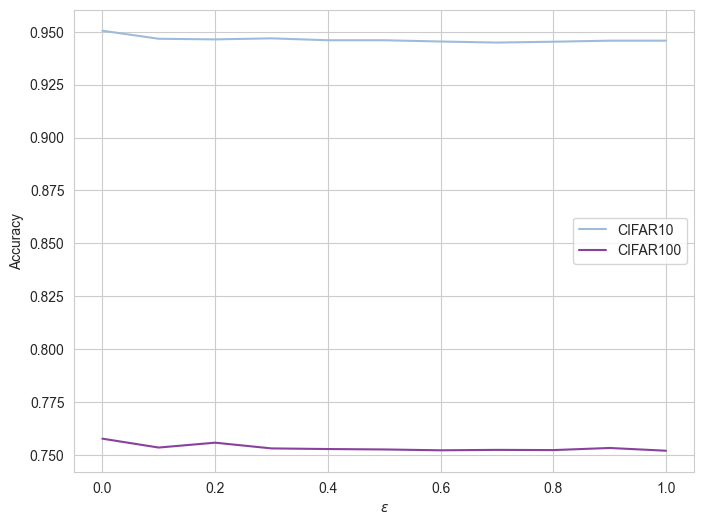

In [16]:
plt.figure(figsize=(8,6))

# cifar10
eps = []
accs = []

# get the cifar10 data for OE, which corresponds to eps = 0
row = df.iloc[0]
accs.append(row["accuracy"])
eps.append(0)

for i, row in df_cifar10.iterrows():
    eps.append(row["eps_oe"])
    accs.append(row["accuracy"])

plt.plot(eps, accs, label="CIFAR10", linestyle='-', color=colors_cool[0])

#cifar100
eps = []
accs = []

# get the cifar100 data for OE, which corresponds to eps = 0
row = df.iloc[1]
accs.append(row["accuracy"])
eps.append(0)

for i, row in df_cifar100.iterrows():
    eps.append(row["eps_oe"])
    accs.append(row["accuracy"])

plt.plot(eps, accs, label="CIFAR100", linestyle='-', color=colors_cool[2])

# imagenet
eps = []
accs = []

for i,row in df_imagenet.iterrows():
    eps.append(row["eps_oe"])
    accs.append(row["accuracy"])

#plt.plot(eps, accs, label="ImageNet", linestyle='-', color=colors_cool[4])


plt.xlabel('$\epsilon$')
plt.ylabel('Accuracy')

plt.legend()

# plt.savefig("plots/aoe_cifar10_cifar100_imagenet_aoe_accuracy.pdf", bbox_inches='tight')
plt.savefig("plots/aoe_cifar10_cifar100_aoe_accuracy.pdf", bbox_inches='tight')
plt.show()



In [17]:
df_train_auroc = df1[df1["train_auroc"]==True]

In [18]:
df_train_auroc

,name,model,dataset_out,epochs,learning_rate,batch_size,oe_batch_size,test_bs,momentum,decay,...,adv_oe,dataset_in,save_id,accuracy,auroc_train,auroc_test,auroc_adversarial,loss,short_name,train_id
26,This experiment computes EBA AOE and OE and th...,wrn,GAN_IMG,10,0.0005,64,64,128,0.9,0.0005,...,EBA,cifar10,20240325_185650,0.9458,"[{""epoch"": 0, ""auroc"": [[{""AUROC"": 0.968254566...","{""empty"": ""empty""}","{""empty"": ""empty""}","[{""epoch"": 0, ""loss"": 0.6247}, {""epoch"": 1, ""l...",cifar_effect_epochs,20240325_185646
27,This experiment computes EBA AOE and OE and th...,wrn,GAN_IMG,10,0.0005,64,64,128,0.9,0.0005,...,EBA,cifar100,20240325_192654,0.7495,"[{""epoch"": 0, ""auroc"": [[{""AUROC"": 0.867167532...","{""empty"": ""empty""}","{""empty"": ""empty""}","[{""epoch"": 0, ""loss"": 1.2725}, {""epoch"": 1, ""l...",cifar_effect_epochs,20240325_192650


In [19]:
df_train_auroc_10 = df_train_auroc[df_train_auroc["dataset_in"]=="cifar10"]
df_train_auroc_100 = df_train_auroc[df_train_auroc["dataset_in"]=="cifar100"]

train_auroc_10 = json.loads(df_train_auroc_10.iloc[0]["auroc_train"])
train_auroc_100 = json.loads(df_train_auroc_100.iloc[0]["auroc_train"])

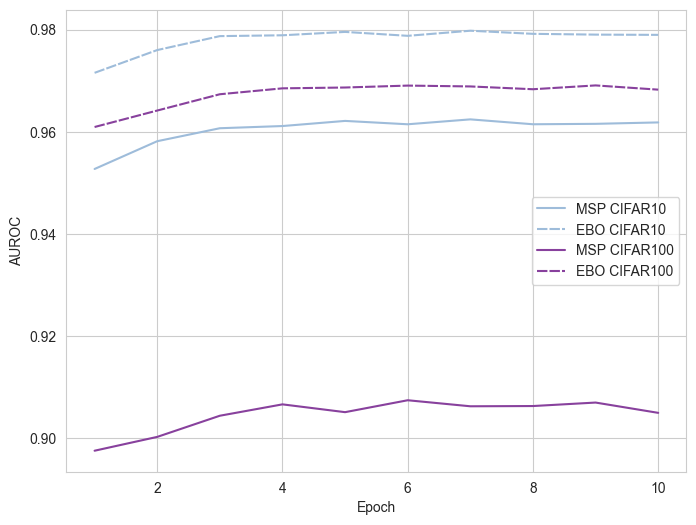

In [75]:
plt.figure(figsize=(8,6))

epochs = []
softmax_aurocs_list = []
energy_aurocs_list = []
for el in train_auroc_10:
    epochs.append(el["epoch"] +1 )
    softmax_aurocs = el["auroc"][0]
    avg_softmax_auroc = softmax_aurocs[-1]["metrics"]["AUROC"]
    softmax_aurocs_list.append(avg_softmax_auroc)
    energy_aurocs = el["auroc"][1]
    avg_energy_auroc = energy_aurocs[-1]["metrics"]["AUROC"]
    energy_aurocs_list.append(avg_energy_auroc)


plt.plot(epochs, softmax_aurocs_list, label="MSP CIFAR10", linestyle='-', color=colors_cool[0])
plt.plot(epochs, energy_aurocs_list, label="EBO CIFAR10", linestyle=(0, (5, 1)), color=colors_cool[0])

epochs = []
softmax_aurocs_list = []
energy_aurocs_list = []
for el in train_auroc_100:
    epochs.append(el["epoch"] + 1)
    softmax_aurocs = el["auroc"][0]
    avg_softmax_auroc = softmax_aurocs[-1]["metrics"]["AUROC"]
    softmax_aurocs_list.append(avg_softmax_auroc)
    energy_aurocs = el["auroc"][1]
    avg_energy_auroc = energy_aurocs[-1]["metrics"]["AUROC"]
    energy_aurocs_list.append(avg_energy_auroc)

plt.plot(epochs, softmax_aurocs_list, label="MSP CIFAR100", linestyle='-', color=colors_cool[2])
plt.plot(epochs, energy_aurocs_list, label="EBO CIFAR100", linestyle=(0, (5, 1)), color=colors_cool[2])

plt.xlabel('Epoch')
plt.ylabel('AUROC')
plt.legend()
plt.savefig("plots/train_auroc_cifar10_cifar100.pdf")
plt.show()

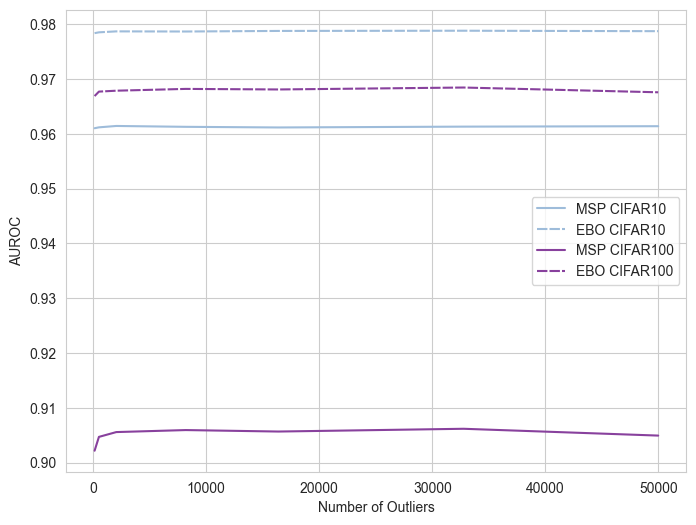

In [73]:
df_cifar_outliers = df[df["short_name"]=="cifar_n_outliers"]
df_cifar_outliers_10 = df_cifar_outliers[df_cifar_outliers["dataset_in"]=="cifar10"]
df_cifar_outliers_100 = df_cifar_outliers[df_cifar_outliers["dataset_in"]=="cifar100"]

plt.figure(figsize=(8,6))

#cifar10
softmax_aurocs_list = []
energy_aurocs_list = []
n_outliers = []

for row in df_cifar_outliers_10.iterrows():
    row = row[1]
    #print(row["n_out_images"])
    aurocs = json.loads(row["auroc_test"])
    softmax_aurocs = aurocs[0]
    energy_aurocs = aurocs[1]
    average_softmax_auroc = softmax_aurocs[-1]["metrics"]["AUROC"]
    average_energy_auroc = energy_aurocs[-1]["metrics"]["AUROC"]
    softmax_aurocs_list.append(average_softmax_auroc)
    energy_aurocs_list.append(average_energy_auroc)
    n_outliers.append(row["n_out_images"])


plt.plot(n_outliers, softmax_aurocs_list, label="MSP CIFAR10", linestyle='-', color=colors_cool[0])
plt.plot(n_outliers, energy_aurocs_list, label="EBO CIFAR10", linestyle=(0, (5, 1)), color=colors_cool[0])

#cifar100
softmax_aurocs_list = []
energy_aurocs_list = []
n_outliers = []

for row in df_cifar_outliers_100.iterrows():
    row = row[1]
    aurocs = json.loads(row["auroc_test"])
    softmax_aurocs = aurocs[0]
    energy_aurocs = aurocs[1]
    average_softmax_auroc = softmax_aurocs[-1]["metrics"]["AUROC"]
    average_energy_auroc = energy_aurocs[-1]["metrics"]["AUROC"]
    softmax_aurocs_list.append(average_softmax_auroc)
    energy_aurocs_list.append(average_energy_auroc)
    n_outliers.append(row["n_out_images"])

plt.plot(n_outliers, softmax_aurocs_list, label="MSP CIFAR100", linestyle='-', color=colors_cool[2])
plt.plot(n_outliers, energy_aurocs_list, label="EBO CIFAR100", linestyle=(0, (5, 1)), color=colors_cool[2])


plt.xlabel('Number of Outliers')
plt.ylabel('AUROC')
plt.legend()
plt.savefig("plots/cifar_n_outliers_aurocs.pdf", bbox_inches='tight')
plt.show()

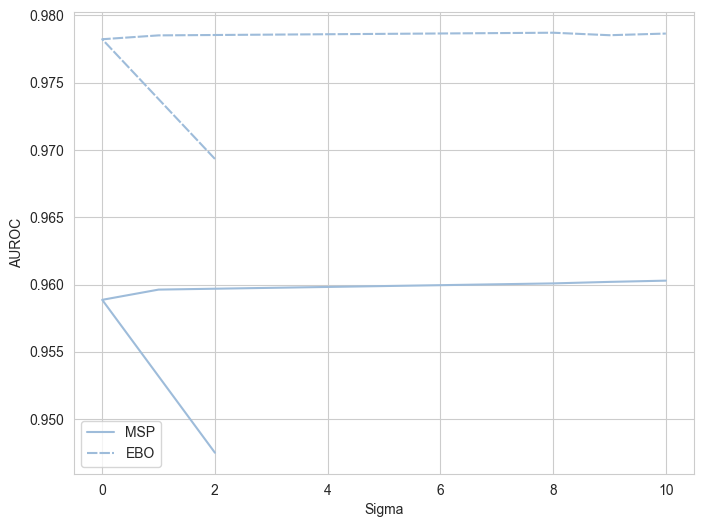

In [104]:
df_sigma = df[df["short_name"]=="cifar_sigma"]

softmax_aurocs_list = []
energy_aurocs_list = []
sigma_list = []

for row in df_sigma.iterrows():
    row = row[1]
    aurocs = json.loads(row["auroc_test"])
    softmax_aurocs = aurocs[0]
    energy_aurocs = aurocs[1]
    average_softmax_auroc = softmax_aurocs[-1]["metrics"]["AUROC"]
    average_energy_auroc = energy_aurocs[-1]["metrics"]["AUROC"]
    softmax_aurocs_list.append(average_softmax_auroc)
    energy_aurocs_list.append(average_energy_auroc)
    sigma_list.append(row["gan_sigma"])

plt.figure(figsize=(8,6))

plt.plot(sigma_list, softmax_aurocs_list, label="MSP", linestyle='-', color=colors_cool[0])
plt.plot(sigma_list, energy_aurocs_list, label="EBO", linestyle=(0, (5, 1)), color=colors_cool[0])

plt.xlabel('Sigma')
plt.ylabel('AUROC')
plt.legend()
plt.savefig("plots/cifar_sigma_aurocs.pdf", bbox_inches='tight')
plt.show()

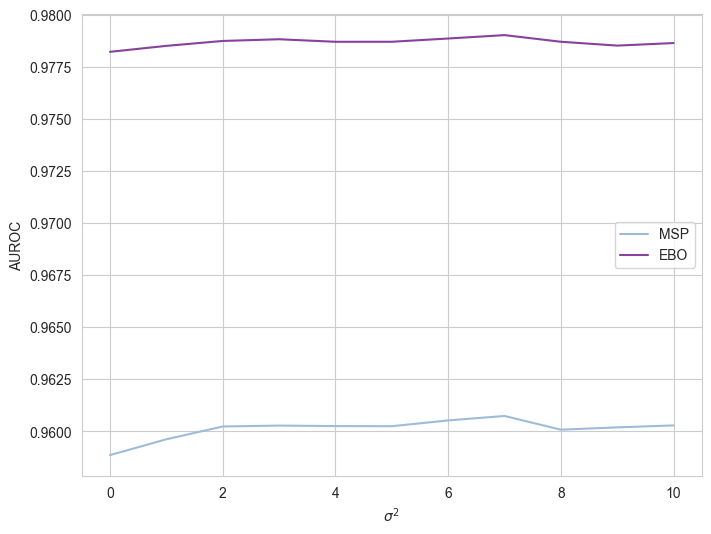

In [111]:
auroc_softmax_list_manual = []
auroc_energy_list_manual = []
# 0
auroc_softmax_list_manual.append(0.9588611125946045)
auroc_energy_list_manual.append(0.9782236590981483)
#1
auroc_softmax_list_manual.append(0.9596211686730385)
auroc_energy_list_manual.append(0.978510171175003)
#2
auroc_softmax_list_manual.append(0.9602359905838966)
auroc_energy_list_manual.append(0.9787458181381226)
#3
auroc_softmax_list_manual.append(0.9602791741490364)
auroc_energy_list_manual.append(0.978828027844429)
#4
auroc_softmax_list_manual.append(0.9602554067969322)
auroc_energy_list_manual.append(0.9787064045667648)
#5
auroc_softmax_list_manual.append(0.9602492973208427)
auroc_energy_list_manual.append(0.9787070751190186)
#6
auroc_softmax_list_manual.append(0.9605267345905304)
auroc_energy_list_manual.append(0.9788631349802017)
#7
auroc_softmax_list_manual.append(0.9607403501868248)
auroc_energy_list_manual.append(0.9790259227156639)
#8
auroc_softmax_list_manual.append(0.960081934928894)
auroc_energy_list_manual.append(0.9787075147032738)
#9
auroc_softmax_list_manual.append(0.9601942524313927)
auroc_energy_list_manual.append(0.9785226583480835)
#10
auroc_softmax_list_manual.append(0.96028633415699)
auroc_energy_list_manual.append(0.9786451458930969)

plt.figure(figsize=(8,6))

plt.plot(range(11), auroc_softmax_list_manual, label="MSP", linestyle='-', color=colors_cool[0])
plt.plot(range(11), auroc_energy_list_manual, label="EBO", linestyle="-", color=colors_cool[2])

plt.xlabel('${\sigma}^2$')
plt.ylabel('AUROC')
plt.legend()
plt.savefig("plots/cifar10_sigma_aurocs.pdf", bbox_inches='tight')
plt.show()